# Symetric Double Pendulum

### Imports

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
#from quickplot import QuickPlot
#import quickplot
#quickplot.__version__

## Equations of motion

The hamiltonian of the symmetric ($R_1=R_2=R, m_1=m_2=m$) double pendulum in gravity reads
$\tilde{H}=p_1^2+\frac{1}{2}p_2^2+\lambda\left(2\sin{q_1}+\sin{q_2}\right)$ with $q_i=\phi_i$ and $p_i=\dot{\phi_i}$

whith the parameter $\lambda=\frac{g}{R}$

In [257]:
l = 10

thus the equations of motion are given by

$\dot{q_1}=\frac{\partial \tilde{H}}{\partial p_1} = 2p_1$

$\dot{q_2}=\frac{\partial \tilde{H}}{\partial p_2} = p_2$

$\dot{p_1}=-\frac{\partial \tilde{H}}{\partial q_1} = -2\lambda\cos{q_1}$

$\dot{p_2}=-\frac{\partial \tilde{H}}{\partial q_2} = -\lambda\cos{q_2}$

## Constants of motion

As the Hamiltonian is not explicitly depending on the time, the energy is a constant of motion and the phase space reduces to three dimensions e.g. ($q_1$, $p_1$, $q_2$)

$E = \tilde{H} = p_1^2+\frac{1}{2}p_2^2+\lambda\left(2\sin{q_1}+\sin{q_2}\right)$

$p_2 = \sqrt{E-2p_1^2-2\lambda\left(2\sin{q_1}+\sin{q_2}\right)}$

In [258]:
def energy(q1, q2, p1, p2):
    return p1**2+0.5*p2**2+l*(2*np.sin(q1)+np.sin(q2))

In [259]:
def p2_(E, q1, q2, p1):
    return np.sqrt((E-p1**2-l*(2*np.sin(q1)+np.sin(q2)))*2)

## Recursive formulation of discrete dynamics

The equations of motion can be discretized and integrated and yield the following discrete maps

$q_1^{(n+1)}=q_1^{(n)}+2\Delta t p_1$

$q_2^{(n+1)}=q_2^{(n)}+\Delta t p_1$

$p_1^{(n+1)}=p_1^{(n)}-2\lambda\Delta t \cos{q_1^{(n)}}$

$p_2^{(n+1)} = \sqrt{E-2{p_1^{(n+1)}}^2-2\lambda\left(2\sin{q_1^{(n+1)}}+\sin{q_2^{(n+1)}}\right)}$

In [260]:
def update(q1, q2, p1, p2, dt):
    #p2 = p2_(E=E, q1=q1, q2=q2, p1=p1)
    q1n = q1 + 2*dt*p1
    q2n = q2 + dt*p2
    p1n = p1 - 2*l*dt*np.cos(q1)
    p2n = p2 - l*dt*np.cos(q2)
    #p2_(E=E, q1=q1n, q2=q2n, p1=p1n)
    return q1n, q2n, p1n, p2n

## Coordinates

The coordinates of the pendulum can be extracted by

$x_1 = \cos{q_1}$

$y_1 = \sin{q_1}$

$x_2 = x_1 + \cos{q_2}$

$y_2 = y_1 + \sin{q_2}$

In [261]:
def coords(q1, q2):
    x1, y1 = np.cos(q1), np.sin(q1), 
    return x1, y1, x1 + np.cos(q2), y1 + np.sin(q2)

## Illustration

In [88]:
def draw_pendulum(q1, q2, ax):
    x1, y1, x2, y2 = coords(q1, q2)
    l1, = ax.plot([0,x1],[0,y1], marker='o')
    l2, = ax.plot([x1,x2],[y1,y2], marker='o')
    return l1, l2

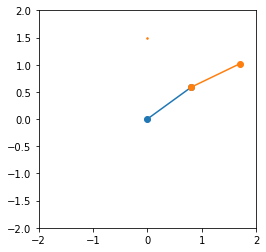

In [119]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(( -2, 2))
ax.set_ylim((-2, 2))

points, = ax.plot([0],[1.5], marker='.', linestyle='', color=l2.get_color(), markersize=3)
l1, l2 = draw_pendulum(np.pi/5, np.pi/7, ax)

In [120]:
# initialization function: plot the background of each frame
def init():
    l1.set_data([], [])
    l2.set_data([], [])
    points.set_data([],[])
    return (l1, l2, points,)

In [121]:
def update_pendulum(q1, q2):
    x1, y1, x2, y2 = coords(q1, q2)
    l1.set_data([0,x1], [0,y1])
    l2.set_data([x1,x2], [y1,y2])
    x, y = points.get_data()
    points.set_data(x +[x2],y +[y2])
    return l1, l2, points

In [124]:
# animation function. This is called sequentially
def animate(i):
    q1 = +i*np.pi/50
    q2 = -i*np.pi/33
    l1, l2, points = update_pendulum(q1, q2)
    return (l1, l2, points,)

In [125]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

In [126]:
HTML(anim.to_html5_video())

In [286]:
# initialization function: plot the background of each frame
d = {}

def init2():
    l1.set_data([], [])
    l2.set_data([], [])
    points.set_data([],[])
    
    d['q1'], d['q2'] = np.pi/5, -np.pi/7
    d['p1'], d['p2'] = np.pi/40, np.pi/13
    
    return (l1, l2, points,)

In [287]:
init2()

(<matplotlib.lines.Line2D at 0x27a73167f98>,
 <matplotlib.lines.Line2D at 0x27a73167668>)

In [288]:
d

{'q1': 0.6283185307179586,
 'q2': -0.4487989505128276,
 'p1': 0.07853981633974483,
 'p2': 0.241660973353061}

In [289]:
energy(q1=d['q1'],q2=d['q2'], p1=d['p1'], p2=d['p2'])

7.452236170445538

In [290]:
d['q1'], d['q2'], d['p1'], d['p2'] = update(q1=d['q1'], q2=d['q2'], p1=d['p1'], p2=d['p2'], dt=0.1)
d

{'q1': 0.6440264939859076,
 'q2': -0.4246328531775215,
 'p1': -1.53949417241015,
 'p2': -0.6593078945493581}

In [291]:
# animation function. This is called sequentially
def animate2(i):
    d['q1'], d['q2'], d['p1'], d['p2'] = update(q1=d['q1'], q2=d['q2'], p1=d['p1'], p2=d['p2'], dt=0.01)
    l1, l2, points = update_pendulum(d['q1'], d['q2'])
    return (l1, l2, points,)

In [292]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate2, init_func=init2, frames=500, interval=20, blit=True)

In [293]:
HTML(anim.to_html5_video())